In [23]:
import pandas as pd
from pandas import json_normalize
import requests
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import  warnings
warnings.simplefilter("ignore")
import os
import json
from dotenv import load_dotenv

In [24]:
# Read and see the dataset 
df = pd.read_csv ('./dataset/nft_sales.csv', encoding='unicode_escape')
df

,Rank,Collections,Sales,Buyers,Txns,Owners
0,1,Axie Infinity,"$3,328,148,500","1,079,811","9,755,511","2,656,431"
1,2,CryptoPunks,"$1,664,246,968","4,723","18,961","3,289"
2,3,Art Blocks,"$1,075,223,906","20,934","117,602","25,094"
3,4,Bored Ape Yacht Club,"$783,882,186","8,284","22,584","5,862"
4,5,NBA Top Shot,"$781,965,423","374,818","11,790,699","603,928"
...,...,...,...,...,...,...
245,246,Evolution,"$2,536,468",746,"4,961","2,061"
246,247,LegionPunks,"$2,535,490","1,702","3,794","2,410"
247,248,BabyApes,"$2,521,714","1,671","3,405","2,785"
248,249,Train of the Century,"$2,504,080","3,139","39,460","3,160"


In [25]:
# This dataset is from the 25th Nov 2021, we are going to clean, rename, drop and stay with the top 100
df['Buyers'] = df['Buyers'].str.replace(',', '')
df['Sales'] = df['Sales'].str.replace(',', '')
df['Sales'] = df['Sales'].str.replace('$', '')
df['Txns'] = df['Txns'].str.replace(',', '')
df = df.rename(columns = {'Sales': 'USD_Sales_not_updated', 'Buyers' : 'Buyers_not_updated', 'Txns' : 'Txns_not_updated'})
df['Collections'] = df['Collections'].astype('string')
df['USD_Sales_not_updated'] = pd.to_numeric(df['USD_Sales_not_updated'])
df['Buyers_not_updated'] = pd.to_numeric(df['Buyers_not_updated'])
df['Txns_not_updated'] = pd.to_numeric(df['Txns_not_updated'])
df = df.drop(columns=['Owners'])
df = df[:100]
df.head()

,Rank,Collections,USD_Sales_not_updated,Buyers_not_updated,Txns_not_updated
0,1,Axie Infinity,3328148500,1079811,9755511
1,2,CryptoPunks,1664246968,4723,18961
2,3,Art Blocks,1075223906,20934,117602
3,4,Bored Ape Yacht Club,783882186,8284,22584
4,5,NBA Top Shot,781965423,374818,11790699


In [26]:
# Add a usd per transaction column, add a usd per buyer, add transaction per buyers and convert sales to usd million.
df['$/Txn_not_updated'] = df['USD_Sales_not_updated'] // df['Txns_not_updated']
df['$/Buyer_not_updated'] = df['USD_Sales_not_updated'] // df['Buyers_not_updated']
df['Txn/Buyer_not_updated'] = df['Txns_not_updated'] / df['Buyers_not_updated']
df['USD_Sales_not_updated'] = df['USD_Sales_not_updated'] / 1e6
df = df.rename(columns = {'USD_Sales_not_updated': 'USD_Sales_in_millions_not_updated'})
df

,Rank,Collections,USD_Sales_in_millions_not_updated,Buyers_not_updated,Txns_not_updated,$/Txn_not_updated,$/Buyer_not_updated,Txn/Buyer_not_updated
0,1,Axie Infinity,3328.148500,1079811,9755511,341,3082,9.034462
1,2,CryptoPunks,1664.246968,4723,18961,87772,352370,4.014609
2,3,Art Blocks,1075.223906,20934,117602,9142,51362,5.617751
3,4,Bored Ape Yacht Club,783.882186,8284,22584,34709,94626,2.726219
4,5,NBA Top Shot,781.965423,374818,11790699,66,2086,31.457131
...,...,...,...,...,...,...,...,...
95,96,Solsteads,17.915196,1621,3120,5742,11051,1.924738
96,97,Galaxy Fight Club,17.903757,4232,13866,1291,4230,3.276465
97,98,CryptoArte,17.817569,4121,9709,1835,4323,2.355982
98,99,Forgotten Runes,17.729910,3620,11562,1533,4897,3.193923


In [27]:
# Load token to access API
load_dotenv()
token = os.getenv('token')
token


'ZEm3E4lHDtadVzER1LjNztyCf0FTup3I'

In [28]:
import requests

url = "https://api.cryptoslam.io/im6pi8nxcs120nhb/v1/collections/top-100?timeRange=all"
headers = {
  "X-BLOBR-KEY": token
}
response = requests.get(url, headers=headers)

print(response.text)

{"data":[{"rank":1,"collectionImageURL":"https://d1nht67oz99wd1.cloudfront.net/resized/axie-infinity-logo_resized.png","collectionName":"Axie Infinity","collectionId":"axie-infinity","paymentToken":"ETH","buyerCount":1791631,"sellerCount":1337430,"transactionCount":17718939,"salesVolumeChangePercentage":0,"blockchainId":"ronin","quote":{"USD":{"salesVolume":4090984208.7145714389549359162,"previousSalesVolume":0.0},"ETH":{"salesVolume":1328209.4404534904931958260020,"previousSalesVolume":0.0}}},{"rank":2,"collectionImageURL":"https://cryptoslam-token-images.s3.amazonaws.com/icons/bored ape yatch club.png","collectionName":"Bored Ape Yacht Club","collectionId":"bored-ape-yacht-club","paymentToken":"ETH","buyerCount":12071,"sellerCount":9521,"transactionCount":32743,"salesVolumeChangePercentage":0.0,"blockchainId":"ethereum","quote":{"USD":{"salesVolume":2446885967.71,"previousSalesVolume":2446885967.71},"ETH":{"salesVolume":18665748.1030449,"previousSalesVolume":18665748.1030449}}},{"ran

In [29]:
# Normalize data from API
df_api = json_normalize(response.json()['data'])
df_api.head()


,rank,collectionImageURL,collectionName,collectionId,paymentToken,buyerCount,sellerCount,transactionCount,salesVolumeChangePercentage,blockchainId,quote.USD.salesVolume,quote.USD.previousSalesVolume,quote.ETH.salesVolume,quote.ETH.previousSalesVolume,quote.Flow.salesVolume,quote.Flow.previousSalesVolume,quote.WAX.salesVolume,quote.WAX.previousSalesVolume,quote.SOL.salesVolume,quote.SOL.previousSalesVolume
0,1,https://d1nht67oz99wd1.cloudfront.net/resized/...,Axie Infinity,axie-infinity,ETH,1791631,1337430,17718939,0.0,ronin,4.090984e+09,0.000000e+00,1.328209e+06,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
1,2,https://cryptoslam-token-images.s3.amazonaws.c...,Bored Ape Yacht Club,bored-ape-yacht-club,ETH,12071,9521,32743,0.0,ethereum,2.446886e+09,2.446886e+09,1.866575e+07,1.866575e+07,NaN,NaN,NaN,NaN,NaN,NaN
2,3,https://d1nht67oz99wd1.cloudfront.net/resized/...,CryptoPunks,cryptopunks,ETH,6088,4083,22292,0.0,ethereum,2.392128e+09,0.000000e+00,8.954108e+05,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
3,4,https://d1nht67oz99wd1.cloudfront.net/resized/...,Mutant Ape Yacht Club,mutant-ape-yacht-club,ETH,23847,18747,51995,0.0,ethereum,1.749302e+09,1.749302e+09,1.025205e+08,1.025205e+08,NaN,NaN,NaN,NaN,NaN,NaN
4,5,https://d1nht67oz99wd1.cloudfront.net/resized/...,Art Blocks,art-blocks,ETH,33648,33375,185253,0.0,ethereum,1.311729e+09,0.000000e+00,4.369858e+05,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
#Clean API dataframe to get the data needed for investigation
df_api = df_api[['rank', 'blockchainId', 'collectionName','quote.USD.salesVolume', 'buyerCount', 'transactionCount']]
df_api = df_api.rename(columns = {'rank' : 'Rank_Updated', 'collectionName' : 'Collections', 'buyerCount' : 'Buyers_Updated', 'transactionCount' : 'Txns_Updated', 'quote.USD.salesVolume': 'USD_Sales_Updated'})
df_api['Collections'] = df_api['Collections'].astype('string')
df_api['blockchainId']= df_api['blockchainId'].astype('string')
df_api.head()

,Rank_Updated,blockchainId,Collections,USD_Sales_Updated,Buyers_Updated,Txns_Updated
0,1,ronin,Axie Infinity,4.090984e+09,1791631,17718939
1,2,ethereum,Bored Ape Yacht Club,2.446886e+09,12071,32743
2,3,ethereum,CryptoPunks,2.392128e+09,6088,22292
3,4,ethereum,Mutant Ape Yacht Club,1.749302e+09,23847,51995
4,5,ethereum,Art Blocks,1.311729e+09,33648,185253


In [31]:
#Create new columns, showing the kpis to be able to compare.
df_api['$/Txn_Updated'] = df_api['USD_Sales_Updated'] // df_api['Txns_Updated']
df_api['$/Txn_Updated'] = df_api['$/Txn_Updated'].astype('int64')
df_api['$/Buyer_Updated'] = df_api['USD_Sales_Updated'] // df_api['Buyers_Updated']
df_api['$/Buyer_Updated'] = df_api['$/Buyer_Updated'].astype('int64')
df_api['Txn/Buyer_Updated'] = df_api['Txns_Updated'] / df_api['Buyers_Updated']
df_api['USD_Sales_Updated'] = df_api['USD_Sales_Updated'] / 1e6
df_api = df_api.rename(columns = {'USD_Sales_Updated': 'USD_Sales_in_millions_Updated'})
df_api.head()


,Rank_Updated,blockchainId,Collections,USD_Sales_in_millions_Updated,Buyers_Updated,Txns_Updated,$/Txn_Updated,$/Buyer_Updated,Txn/Buyer_Updated
0,1,ronin,Axie Infinity,4090.984209,1791631,17718939,230,2283,9.889837
1,2,ethereum,Bored Ape Yacht Club,2446.885968,12071,32743,74730,202707,2.712534
2,3,ethereum,CryptoPunks,2392.128017,6088,22292,107308,392925,3.661629
3,4,ethereum,Mutant Ape Yacht Club,1749.301674,23847,51995,33643,73355,2.180358
4,5,ethereum,Art Blocks,1311.728715,33648,185253,7080,38983,5.505617


In [32]:
# List collections to be able to compare changes
Collections_before = df['Collections'].tolist()
Collections_after = df_api['Collections'].tolist()
 

In [220]:
# We are going to create a list with the collections that were at the top 100 from the dataset and see how many of them still are at the top 100
def Collections_sorted(collections_column):
    Comparing_Collections_before = []
    for i in range(len(Collections_before)):
        new_name = str(Collections_before[i])
        if new_name in Collections_after:
            Comparing_Collections_before.append('@' + new_name)  
        elif new_name not in Collections_after:
            Comparing_Collections_before.append(new_name) 
    return(Comparing_Collections_before)     

In [221]:
df['Collections']= Collections_sorted(list(df['Collections']))
df.head()

,Rank,Collections,USD_Sales_in_millions_not_updated,Buyers_not_updated,Txns_not_updated,$/Txn_not_updated,$/Buyer_not_updated,Txn/Buyer_not_updated
0,1,@Axie Infinity,3328.148500,1079811,9755511,341,3082,9.034462
1,2,@CryptoPunks,1664.246968,4723,18961,87772,352370,4.014609
2,3,@Art Blocks,1075.223906,20934,117602,9142,51362,5.617751
3,4,@Bored Ape Yacht Club,783.882186,8284,22584,34709,94626,2.726219
4,5,@NBA Top Shot,781.965423,374818,11790699,66,2086,31.457131


In [222]:
def Collections_sorted_api(collections_column):
    Comparing_Collections_after = []
    for i in range(len(Collections_after)):
        new_name = str(Collections_after[i])
        if new_name in Collections_before: 
            Comparing_Collections_after.append('@' + new_name)  
        elif new_name not in Collections_before:
            Comparing_Collections_after.append(new_name)
    return(Comparing_Collections_after)   

In [223]:
df_api['Collections']= Collections_sorted_api(list(df_api['Collections']))
df_api.head()

,Rank_Updated,blockchainId,Collections,USD_Sales_in_millions_Updated,Buyers_Updated,Txns_Updated,$/Txn_Updated,$/Buyer_Updated,Txn/Buyer_Updated
0,1,ronin,@Axie Infinity,4090.984209,1791631,17718939,230,2283,9.889837
1,2,ethereum,@Bored Ape Yacht Club,2446.885968,12071,32743,74730,202707,2.712534
2,3,ethereum,@CryptoPunks,2392.128017,6088,22292,107308,392925,3.661629
3,4,ethereum,@Mutant Ape Yacht Club,1749.301674,23847,51995,33643,73355,2.180358
4,5,ethereum,@Art Blocks,1311.728715,33648,185253,7080,38983,5.505617


In [224]:
NFT_collections_that_remain_in_top100 = df[df['Collections'].str.contains('@')==True]
NFT_collections_that_remain_in_top100.set_index('Collections', inplace=True)
NFT_collections_that_remain_in_top100.head()

,Rank,USD_Sales_in_millions_not_updated,Buyers_not_updated,Txns_not_updated,$/Txn_not_updated,$/Buyer_not_updated,Txn/Buyer_not_updated
Collections,,,,,,,
@Axie Infinity,1,3328.148500,1079811,9755511,341,3082,9.034462
@CryptoPunks,2,1664.246968,4723,18961,87772,352370,4.014609
@Art Blocks,3,1075.223906,20934,117602,9142,51362,5.617751
@Bored Ape Yacht Club,4,783.882186,8284,22584,34709,94626,2.726219
@NBA Top Shot,5,781.965423,374818,11790699,66,2086,31.457131


In [225]:
NFT_collections_that_remain_top100_Updated = df_api[df_api['Collections'].str.contains('@')==True]
NFT_collections_that_remain_top100_Updated.set_index('Collections', inplace=True)
NFT_collections_that_remain_top100_Updated.head()

,Rank_Updated,blockchainId,USD_Sales_in_millions_Updated,Buyers_Updated,Txns_Updated,$/Txn_Updated,$/Buyer_Updated,Txn/Buyer_Updated
Collections,,,,,,,,
@Axie Infinity,1,ronin,4090.984209,1791631,17718939,230,2283,9.889837
@Bored Ape Yacht Club,2,ethereum,2446.885968,12071,32743,74730,202707,2.712534
@CryptoPunks,3,ethereum,2392.128017,6088,22292,107308,392925,3.661629
@Mutant Ape Yacht Club,4,ethereum,1749.301674,23847,51995,33643,73355,2.180358
@Art Blocks,5,ethereum,1311.728715,33648,185253,7080,38983,5.505617


In [226]:
NFT_collections_csv = pd.concat([NFT_collections_that_remain_in_top100, NFT_collections_that_remain_top100_Updated], axis=1)
NFT_collections_csv.head()

,Rank,USD_Sales_in_millions_not_updated,Buyers_not_updated,Txns_not_updated,$/Txn_not_updated,$/Buyer_not_updated,Txn/Buyer_not_updated,Rank_Updated,blockchainId,USD_Sales_in_millions_Updated,Buyers_Updated,Txns_Updated,$/Txn_Updated,$/Buyer_Updated,Txn/Buyer_Updated
Collections,,,,,,,,,,,,,,,
@Axie Infinity,1,3328.148500,1079811,9755511,341,3082,9.034462,1,ronin,4090.984209,1791631,17718939,230,2283,9.889837
@CryptoPunks,2,1664.246968,4723,18961,87772,352370,4.014609,3,ethereum,2392.128017,6088,22292,107308,392925,3.661629
@Art Blocks,3,1075.223906,20934,117602,9142,51362,5.617751,5,ethereum,1311.728715,33648,185253,7080,38983,5.505617
@Bored Ape Yacht Club,4,783.882186,8284,22584,34709,94626,2.726219,2,ethereum,2446.885968,12071,32743,74730,202707,2.712534
@NBA Top Shot,5,781.965423,374818,11790699,66,2086,31.457131,7,flow,1033.386630,446665,21862169,47,2313,48.945337


In [227]:
NFT_collections_csv.to_csv('./dataset/NFT_collections.csv')

In [228]:
NFT_data = NFT_collections_csv[['Rank', 'Rank_Updated','blockchainId', 'USD_Sales_in_millions_not_updated', 'USD_Sales_in_millions_Updated', 'Buyers_not_updated', 'Buyers_Updated', 'Txns_not_updated', 'Txns_Updated']]
NFT_data.head()

,Rank,Rank_Updated,blockchainId,USD_Sales_in_millions_not_updated,USD_Sales_in_millions_Updated,Buyers_not_updated,Buyers_Updated,Txns_not_updated,Txns_Updated
Collections,,,,,,,,,
@Axie Infinity,1,1,ronin,3328.148500,4090.984209,1079811,1791631,9755511,17718939
@CryptoPunks,2,3,ethereum,1664.246968,2392.128017,4723,6088,18961,22292
@Art Blocks,3,5,ethereum,1075.223906,1311.728715,20934,33648,117602,185253
@Bored Ape Yacht Club,4,2,ethereum,783.882186,2446.885968,8284,12071,22584,32743
@NBA Top Shot,5,7,flow,781.965423,1033.386630,374818,446665,11790699,21862169


In [231]:
NFT_kpis = NFT_collections_csv[['blockchainId', '$/Txn_not_updated', '$/Txn_Updated', '$/Buyer_not_updated', '$/Buyer_Updated', 'Txn/Buyer_not_updated','Txn/Buyer_Updated']]
NFT_kpis.head()

,blockchainId,$/Txn_not_updated,$/Txn_Updated,$/Buyer_not_updated,$/Buyer_Updated,Txn/Buyer_not_updated,Txn/Buyer_Updated
Collections,,,,,,,
@Axie Infinity,ronin,341,230,3082,2283,9.034462,9.889837
@CryptoPunks,ethereum,87772,107308,352370,392925,4.014609,3.661629
@Art Blocks,ethereum,9142,7080,51362,38983,5.617751,5.505617
@Bored Ape Yacht Club,ethereum,34709,74730,94626,202707,2.726219,2.712534
@NBA Top Shot,flow,66,47,2086,2313,31.457131,48.945337


In [234]:
NFT_kpis['$/Txn_variation'] = NFT_kpis['$/Txn_Updated'] / NFT_kpis['$/Txn_not_updated']
NFT_kpis['$/Buyer_variation'] = NFT_kpis['$/Buyer_Updated'] / NFT_kpis['$/Buyer_not_updated']
NFT_kpis['Txn/Buyer_variation'] = NFT_kpis['Txn/Buyer_Updated'] / NFT_kpis['Txn/Buyer_not_updated']
NFT_kpis.head()

,blockchainId,$/Txn_not_updated,$/Txn_Updated,$/Buyer_not_updated,$/Buyer_Updated,Txn/Buyer_not_updated,Txn/Buyer_Updated,$/Txn_variation,$/Buyer_variation,Txn/Buyer_variation
Collections,,,,,,,,,,
@Axie Infinity,ronin,341,230,3082,2283,9.034462,9.889837,0.674487,0.740753,1.094679
@CryptoPunks,ethereum,87772,107308,352370,392925,4.014609,3.661629,1.222577,1.115092,0.912076
@Art Blocks,ethereum,9142,7080,51362,38983,5.617751,5.505617,0.774448,0.758985,0.980039
@Bored Ape Yacht Club,ethereum,34709,74730,94626,202707,2.726219,2.712534,2.153044,2.142191,0.994980
@NBA Top Shot,flow,66,47,2086,2313,31.457131,48.945337,0.712121,1.108821,1.555938


In [141]:
NFT_kpis_variation = NFT_kpis[['blockchainId', 'Percentage_of_Total_Sales_variation', '$/Txn_variation', '$/Buyer_variation', 'Txn/Buyer_variation']]
NFT_kpis_variation.head()

,blockchainId,Percentage_of_Total_Sales_variation,$/Txn_variation,$/Buyer_variation,Txn/Buyer_variation
Collections,,,,,
@Axie Infinity,ronin,0.594285,0.674487,0.740753,1.094679
@CryptoPunks,ethereum,0.694922,1.222577,1.115092,0.912076
@Art Blocks,ethereum,0.589813,0.774448,0.758985,0.980039
@Bored Ape Yacht Club,ethereum,1.509150,2.153044,2.142191,0.994980
@NBA Top Shot,flow,0.638917,0.712121,1.108821,1.555938


In [235]:
a1 = NFT_kpis_variation['$/Txn_variation'].min()
print(a1)
a2 = NFT_kpis_variation['$/Txn_variation'].median()
print(a2)
a3 = NFT_kpis_variation['$/Txn_variation'].mean()
print(a3)
a4 = NFT_kpis_variation['$/Txn_variation'].max()
print(a4)
a5= NFT_kpis_variation['$/Txn_variation'].std()
print(a5)

0.11538461538461539
0.938092166370297
1.1138836700544108
2.552621101526211
0.485025795673958


In [242]:
b1 = NFT_kpis_variation['$/Buyer_variation'].min()
print(b1)
b2 = NFT_kpis_variation['$/Buyer_variation'].median()
print(b2)
b3 = NFT_kpis_variation['$/Buyer_variation'].mean()
print(b3)
b4 = NFT_kpis_variation['$/Buyer_variation'].max()
print(b4)
b5 = NFT_kpis_variation['$/Buyer_variation'].std()
print(b5)


0.3421699918010385
0.9915182868326075
1.1557626869657742
2.8152
0.4808588558087434


In [243]:
c1 = NFT_kpis_variation['Txn/Buyer_variation'].min()
print(c1)
c2 = NFT_kpis_variation['Txn/Buyer_variation'].median()
print(c2)
c3 = NFT_kpis_variation['Txn/Buyer_variation'].mean()
print(c3)
c4 = NFT_kpis_variation['Txn/Buyer_variation'].max()
print(c4)
c5 = NFT_kpis_variation['Txn/Buyer_variation'].std()
print(c5)


0.8681740760591143
1.0054280637746587
1.090121649030729
2.9430137905077967
0.333038623470039


In [186]:
Final_Data = {
    '$/Txn_variation' : [0.12, 0.94, 1.11, 2.55, 0.49],
    '$/Buyer_variation' : [0.34, 0.99, 1.16, 2.81, 0.48],
    'Txn/Buyer_variation' : [0.87, 1.01, 1.09, 2.94, 0.33]
}

In [248]:
df_final_data = pd.DataFrame.from_dict(Final_Data, orient='index')
df_final_data.rename({0 : 'Min', 1: 'Median', 2:'Mean',3: 'Max', 4:'Std'}, axis = 1, inplace = True) 
df_final_data

,Min,Median,Mean,Max,Std
$/Txn_variation,0.11,0.93,1.11,2.55,0.48
$/Buyer_variation,0.34,0.99,1.15,2.81,0.48
Txn/Buyer_variation,0.87,1.01,1.09,2.94,0.33


In [ ]:
df_final_data.to_csv('./dataset/kpis.csv')

In [280]:
blockchain_sales = NFT_data.groupby('blockchainId').agg({'USD_Sales_in_millions_not_updated' : 'sum', 'USD_Sales_in_millions_Updated' : 'sum',})
display(blockchain_sales)



,USD_Sales_in_millions_not_updated,USD_Sales_in_millions_Updated
blockchainId,,
ethereum,7174.529747,13961.664810
flow,781.965423,1033.386630
ronin,3328.148500,4090.984209
solana,341.830698,478.280755
wax,142.416548,196.437432


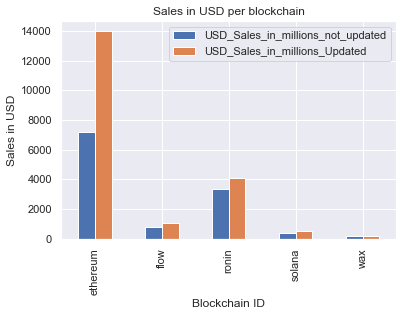

In [289]:
graph_1 = blockchain_sales.plot.bar()
plt.title('Sales in USD per blockchain')
plt.xlabel('Blockchain ID')
plt.ylabel('Sales in USD')
graph_1.figure.savefig('images/Results/Graph_1.png', dpi=1000)

In [267]:
blockchains_transactions = NFT_data.groupby('blockchainId').agg({'Txns_not_updated' : 'sum', 'Txns_Updated': 'sum'},)
display(blockchains_transactions)

,Txns_not_updated,Txns_Updated
blockchainId,,
ethereum,1437917,5071153
flow,11790699,21862169
ronin,9755511,17718939
solana,54262,80819
wax,456350,5414003


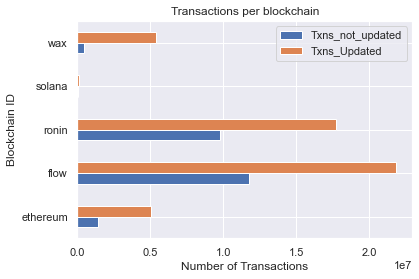

In [290]:
graph_2 = blockchains_transactions.plot.barh()
plt.title('Transactions per blockchain')
plt.xlabel('Number of Transactions')
plt.ylabel('Blockchain ID')
graph_2.figure.savefig('images/Results/Graph_2.png', dpi=1000)

In [283]:
blockchain_kpi = NFT_kpis.groupby('blockchainId').agg({'$/Txn_variation' :'mean', '$/Buyer_variation':'mean', 'Txn/Buyer_variation' : 'mean'},)
display(blockchain_kpi)

,$/Txn_variation,$/Buyer_variation,Txn/Buyer_variation
blockchainId,,,
ethereum,1.180057,1.213464,1.042033
flow,0.712121,1.108821,1.555938
ronin,0.674487,0.740753,1.094679
solana,0.928607,0.912063,0.978171
wax,0.115385,0.342170,2.943014


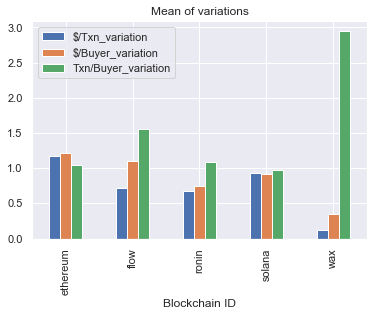

In [291]:
graph_3 = blockchain_kpi.plot.bar()
plt.title('Mean of variations')
plt.xlabel('Blockchain ID')
graph_3.figure.savefig('images/Results/Graph_3.png', dpi=1000)